# EDA for Erin Robinson
Buyer, Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible
Erin Robinson would like to invest in real estate. She has a social responsible approach and would like to buy houses in poor neighborhoods. A huge profit is not her priority, but next to covering her investment costs, a little profit should be gained.
In order to advise Erin Robinson on real estate investments, the following three hypotheses, among others, have been developed:

##### Hypotheses 1
    There are many ways in order to define a "poor neighborhood". For this research, it is assumed, that "poor neighborhoods" are characterised by having a relatively low quality standard. To define these areas within our dataset, hypotheses 1 is: 
    a) Do specific areas (defined by zipcode) differ in their house prices?
    b) Is the quality of the property (defined by grade) in specific areas (defined by zipcodes) below the average?


##### Hypotheses 2 (just little profit)
    Do renovations increase the price?  

##### Hypotheses 3
    Some features of a house have a - supposedly - obvious influence on the possible purchase price. One of them has been confirmed in hypotheses 2. A less obvious feature is the age of the house. For this reason, hypothesis 3 is put forward:
    Are older buildings cheaper? 

### Step 1: Import and set up

In [205]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

from shapely.geometry import Point
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Step 2: Exploring data

In [206]:
#Import the dataset
df_original = pd.read_csv("/Users/lukasiwan/NeueFische/Repositories/EDA-Housing-Project/data/housing_data_merged.csv")


In [207]:
# Data overview
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   date           21597 non-null  object 
 2   id             21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [208]:
df_original.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


### Step 3: Hypotheses 1

#### Data Cleaning:



In [209]:
# Change datatype of "price"
df_original["price"] = df_original["price"].astype("Int64")

In [210]:
# Change datatype of "date"
df_original['date']=pd.to_datetime(df_original["date"], format = "%Y/%m/%d")

In [211]:
# Change "sqft_living" into "sqm_living"
df_original['sqft_living'] = df_original.sqft_living.apply(lambda x: x / 10.764)

# Change datatype to int
df_original['sqft_living'] = df_original['sqft_living'].astype(int)

# Change name of column 
df_original= df_original.rename({'sqft_living':'sqm_living'},axis=1)


In [212]:
# Adding price per sqm as column
df_original = df_original.assign(price_per_sqm=lambda x: x.price / x.sqm_living)

In [213]:
# Reducing columns not needed for Hypotheses 1
df_H1 = df_original.drop(["condition", "price","date", "bedrooms", "bathrooms", "sqft_lot", "floors",
                          "waterfront", "view", "sqft_above", "sqft_basement", "yr_built", "sqft_living15", "sqft_lot15"], axis=1)

In [214]:
# Creating a new column with price categories for "price_per_sqm"
def categorize_price(price):
    if price <= 1500:
        return '0-1,500'
    elif price <= 3000:
        return '1,500-3,000'
    elif price <= 5500:
        return '3,000-5,000'
    else:
        return '5,000+'
    
df_H1['price_category'] = df_H1['price_per_sqm'].apply(categorize_price)

#### Visualisation of data (H1a: Do specific areas (defined by zipcode) differ in their house prices?):

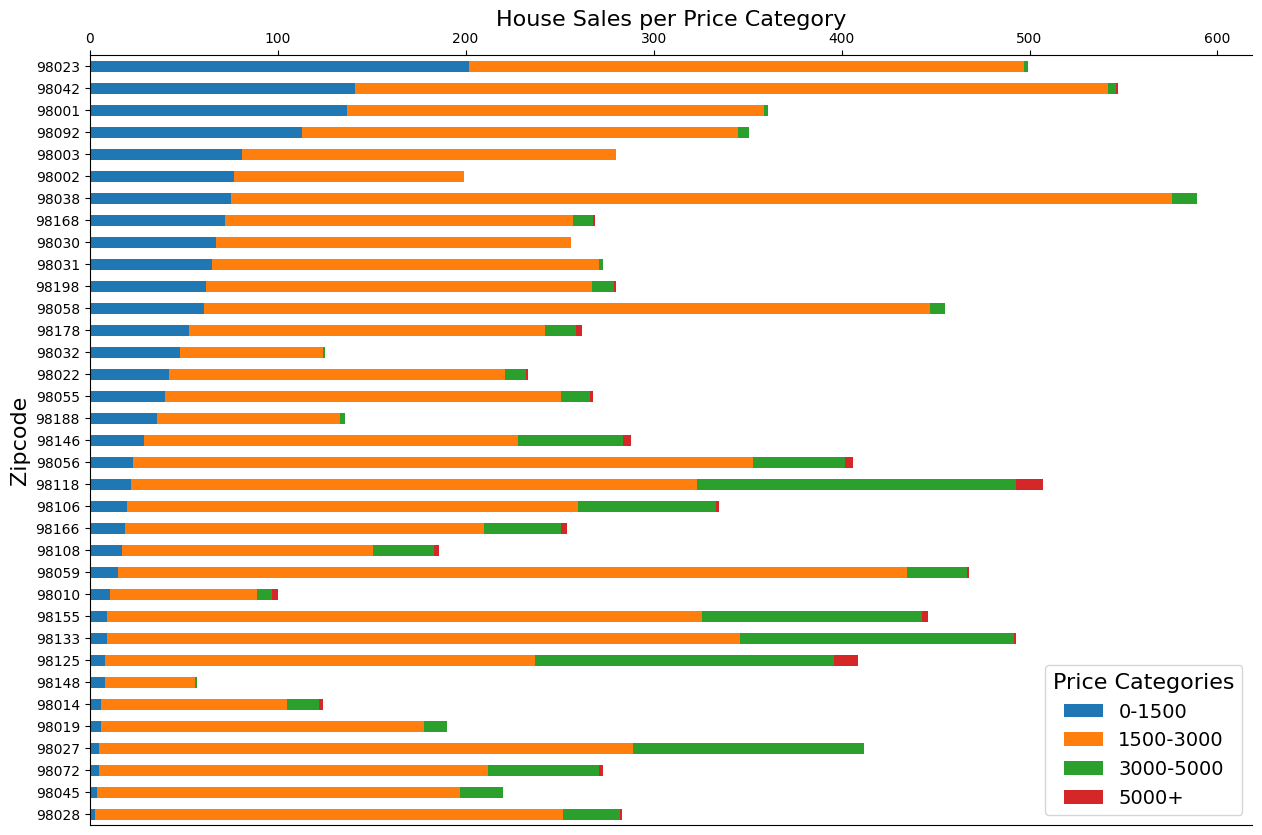

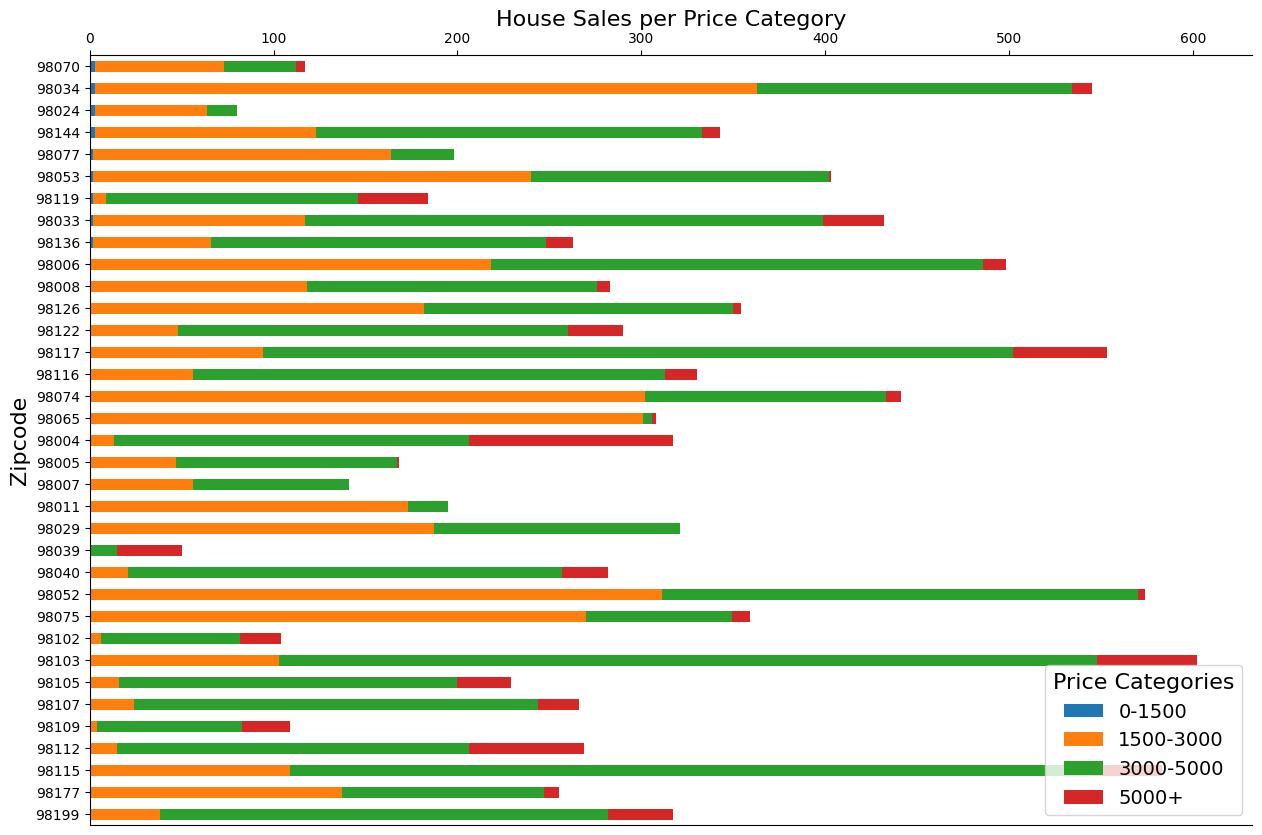

In [249]:
# sort the data by counts from category 0-1500
pivot_df_H101_sorted = pivot_df_H101.sort_values(by='0-1500', ascending=False)

# split the data into two parts
split_idx = len(pivot_df_H101_sorted) // 2
pivot_df_H101_top = pivot_df_H101_sorted[:split_idx]
pivot_df_H101_bottom = pivot_df_H101_sorted[split_idx:]

# create the first diagram (half of zip codes)
fig, ax = plt.subplots(figsize=(15, 10))
pivot_df_H101_top.plot(kind='barh', stacked=True, ax=ax)
ax.invert_yaxis()

# Design
ax.set_xlabel('House Sales per Price Category', fontsize=16)
ax.xaxis.set_label_position('top')
ax.set_ylabel('Zipcode', fontsize=16)
ax.spines['right'].set_visible(False)
ax.xaxis.tick_top()
ax.legend(title='Price Categories', title_fontsize=16, fontsize=14, loc="lower right")

# create the second diagram (half of zip codes)
fig, ax = plt.subplots(figsize=(15, 10))
pivot_df_H101_bottom.plot(kind='barh', stacked=True, ax=ax)
ax.invert_yaxis()

# Design
ax.set_xlabel('House Sales per Price Category', fontsize=16)
ax.xaxis.set_label_position('top')
ax.set_ylabel('Zipcode', fontsize=16)
ax.spines['right'].set_visible(False)
ax.xaxis.tick_top()
ax.legend(title='Price Categories', title_fontsize=16, fontsize=14, loc="lower right")


plt.show()

#### Visualisation of data (H1b: Is the quality of the property (defined by grade) in specific areas (defined by zipcodes) below the overall average?):

In [216]:
# Calculating the average grade of the total dataset
average_grade = df_H1['grade'].mean()
average_grade



7.657915451220076

In [237]:
# Map showing the grade of sold houses
fig = px.scatter_mapbox(
    df_H1[df_H1['grade'] <= 13],  # Option to filter the displayed grade levels
    lat="lat",
    lon="long",
    hover_name="grade",
    hover_data=["grade"],
    color="grade",  # color based on grade
    color_continuous_scale='RdYlGn',
    range_color=[1, 13], 
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [251]:
#Map for showing the average grade of sold houses within a zip code area

# Group by zip code and calculate the average grade
df_grouped = df_H1[df_H1['grade'] <= 13].groupby('zipcode').agg({'lat': 'mean', 'long': 'mean', 'grade': 'mean'}).reset_index()

# Create the scatter map
fig = px.scatter_mapbox(df_grouped,lat="lat",lon="long",hover_name="zipcode",hover_data=["grade"], color="grade", color_continuous_scale='RdYlGn')

fig.update_traces(showlegend=True, marker=dict(size=10))
fig.update_layout(mapbox_style="open-street-map", coloraxis_colorbar=dict(title="Average Grade"))

fig.show()

### Step 4: Hypotheses 2

#### Data Cleaning:

In [ ]:
# Cleaning column "yr_unrenovated". The aim is to delete the last "0" in each sell and transfer the datatype to integer 
#Deleting the last 0 in the cell
df_original["yr_renovated"] = df_original["yr_renovated"] / 10 
# Replacing 0 with NaN and turning the dtype into integer
df_original["yr_renovated"] = df_original["yr_renovated"].replace(0, np.nan).astype('Int64')

In [ ]:
# Deleting the columns which are not important for answering hypotheses 2
df_H2 = df_original.drop(["price", "condition", "grade", "bedrooms", "bathrooms", "sqft_lot", "floors", "waterfront", "view", 
                          "sqft_above", "sqft_basement", "yr_built", "sqft_living15", "sqft_lot15"], axis=1)

df_H2

In [221]:
# Splitting DataFrame into two groups: unrenovated houses and renovated houses. Assumption: ALl houses without a value (year) in column "yr_renovated" are unrenovated.
df_H2_renovated = df_H2[df_H2["yr_renovated"].notna()]
df_H2_unrenovated = df_H2[df_H2["yr_renovated"].isna()]

##### Visualisation of data (H2: Do renovations increase the price?):

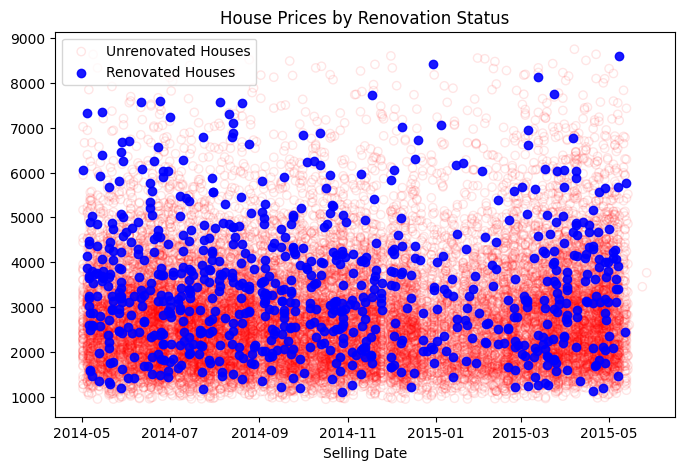

In [254]:
# create a scatter plot of price vs. selling date for unrenovated houses
plt.scatter(df_H2_unrenovated['date'], df_H2_unrenovated['price_per_sqm'], color='red', alpha=0.1, facecolor="none", label='Unrenovated Houses')

# create a scatter plot of price vs. selling date for renovated houses
plt.scatter(df_H2_renovated['date'], df_H2_renovated['price_per_sqm'], color='blue', alpha=0.9,  label='Renovated Houses')

# Design
plt.xlabel('Selling Date')
plt.title('House Prices by Renovation Status')
plt.legend()


plt.show()

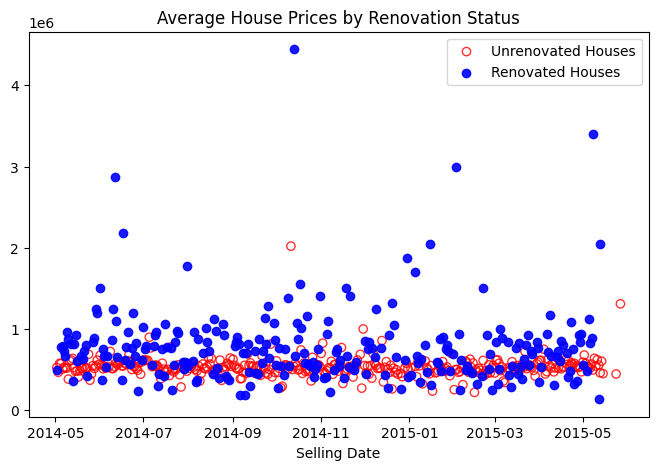

In [255]:
# group the unrenovated houses by selling date and calculate the average price per day
df_H2_unrenovated_grouped = df_H2_unrenovated.groupby('date')['price'].mean().reset_index()

# group the renovated houses by selling date and calculate the average price per day
df_H2_renovated_grouped = df_H2_renovated.groupby('date')['price'].mean().reset_index()

# create a scatter plot 
plt.scatter(df_H2_unrenovated_grouped['date'], df_H2_unrenovated_grouped['price'], 
            color='red', alpha=0.8, facecolor="none", label='Unrenovated Houses')

# create a scatter plot 
plt.scatter(df_H2_renovated_grouped['date'], df_H2_renovated_grouped['price'], 
            color='blue', alpha=0.9, label='Renovated Houses')

# Design
plt.xlabel('Selling Date')
plt.title('Average House Prices by Renovation Status')
plt.legend()


plt.show()

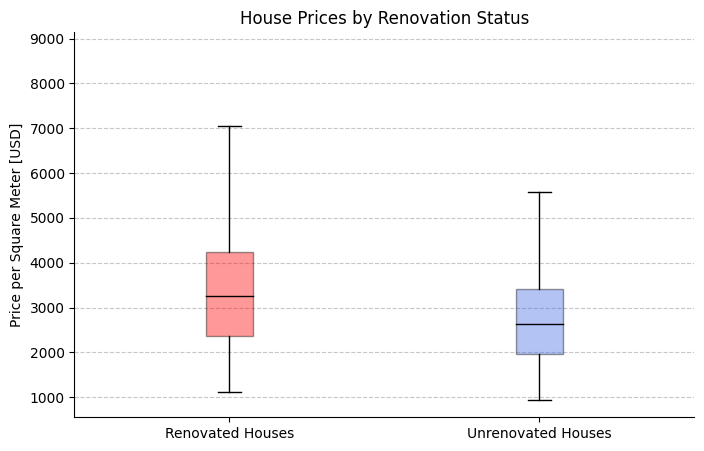

In [263]:
fig, ax = plt.subplots()

# Create boxplot
bp = ax.boxplot([df_H2_renovated['price_per_sqm'], df_H2_unrenovated['price_per_sqm']], 
    labels=['Renovated Houses', 'Unrenovated Houses'], 
    flierprops=dict(markeredgecolor='grey', alpha=0.0), 
    medianprops=dict(color='black'),
    patch_artist=True)

# Change the fill color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor = box_colors[i], alpha = 0.4)

# Design
ax.set_ylabel('Price per Square Meter [USD]')
ax.set_title('House Prices by Renovation Status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

### Hypotheses 3

#### Data Cleaning:

In [226]:
# Adding new collumn: the age of the building
df_original["age_building"] = 2023 - df_original["yr_built"] 

,price,date,id,yr_built,yr_renovated,zipcode,lat,long,price_per_sqm,age_building
14,430000,2015-03-31,1423069102,1968,2005,98027,47.473,-121.994,2324.324,55
77,1140000,2014-05-06,3524039209,1970,2014,98136,47.523,-122.383,3642.173,53
86,720000,2014-11-13,9178601630,1921,1995,98103,47.654,-122.329,4931.507,102
91,460000,2014-09-12,7443000640,1908,2006,98119,47.651,-122.368,3538.462,115
127,1400000,2014-05-28,5699000070,1900,2014,98144,47.593,-122.292,5072.464,123


In [ ]:
# Deleting columns not needed for answering hypotheses 3
df_H3 = df_original.drop(["bedrooms", "bathrooms", "sqm_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", 
                          "sqft_living15", "sqft_lot15"], axis=1)


In [ ]:
# Creating two variables. One with only renovated houses and one with unrenovated houses
df_H3_renovated = df_H3[df_H3["yr_renovated"].notna()]
df_H3_unrenovated = df_H3[df_H3["yr_renovated"].isna()]

##### Visualisation of data (H3: Are older building cheaper?):

In [227]:
# Preparation plot H3.1
# compute the average price of renovated houses at each age
renovated_means = df_H3_renovated.groupby('age_building')['price_per_sqm'].mean()
unrenovated_means = df_H3_unrenovated.groupby('age_building')['price_per_sqm'].mean()

# compute the average price of unrenovated houses at each age
renovated_means = df_H3_renovated.groupby('age_building')['price_per_sqm'].mean()
unrenovated_means = df_H3_unrenovated.groupby('age_building')['price_per_sqm'].mean()




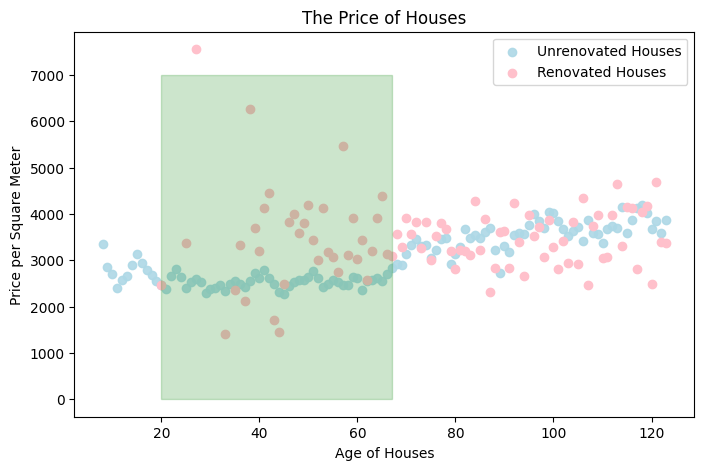

In [264]:
# Plot H3.1
fig = plt.figure()
ax1 =fig.add_subplot(1, 1, 1)

ax1.scatter(unrenovated_means.index, unrenovated_means.values, color='lightblue', alpha = 0.9, label='Unrenovated Houses')
ax1.scatter(renovated_means.index, renovated_means.values, color='pink',alpha = 1.0, label='Renovated Houses')

rectangle = mpatches.Rectangle((20, 0), 47, 7000, color='green', alpha=0.2)
ax1.add_patch(rectangle)
ax1.set_title('The Price of Houses')
ax1.set_xlabel("Age of Houses")
ax1.set_ylabel('Price per Square Meter')
ax1.legend(loc="best")
